Вариант 5

https://archive.ics.uci.edu/dataset/52/ionosphere

In [1]:
!pip install ucimlrepo

In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=23ea106082f33f7932251bae5ef4ceaee9cce80652661d7e51d0dc2453def04d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE, BorderlineSMOTE

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.10.1


In [5]:
import warnings
warnings.filterwarnings('ignore')

Загрузка датасета

In [24]:
# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [ ]:
y.value_counts()

Class
g        225
b        126
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

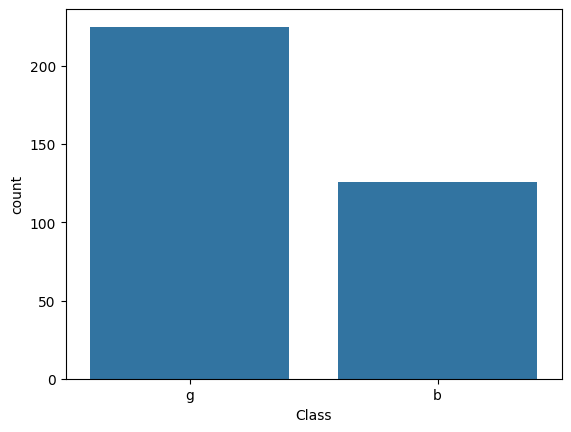

In [ ]:
sns.countplot(x='Class', data=y)

Исходные данные не сбалансированы. Объектов класса b почти в 2 раза меньше. Применим алгоритмы балансировки классов:

In [25]:
# преобразуем в тип int
y.Class = y.Class.map({'g': 1, 'b': 0}).astype(int)

## SMOTE

In [26]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

Проверим: данные сбалансировались!

<Axes: xlabel='Class', ylabel='count'>

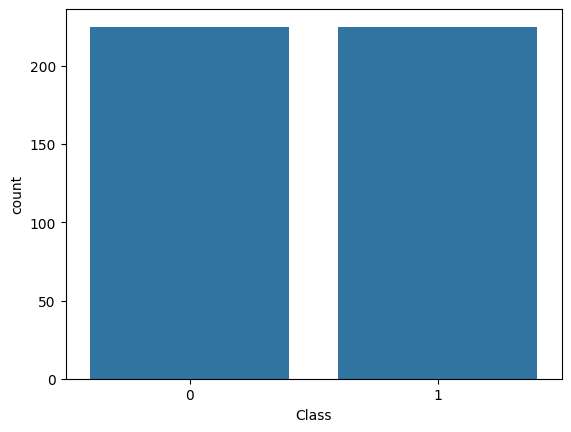

In [27]:
sns.countplot(x='Class', data=y_smote)

In [28]:
# Разбить выборку на обучающую и тестовую в соотношение 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [55]:
# общая функция
def start_svc_knn_rf(X_train, X_test, y_train, y_test):
  svm = SVC()
  svm.fit(X_train, y_train)

  # Предсказание на обучающей и тестовой выборках
  y_train_pred = svm.predict(X_train)
  y_test_pred = svm.predict(X_test)

  # Рассчитать метрики качества
  accuracy_svm = accuracy_score(y_test, y_test_pred)
  precision_svm = precision_score(y_test, y_test_pred)
  recall_svm = recall_score(y_test, y_test_pred)
  f1_svm = f1_score(y_test, y_test_pred)

  print('SVM')
  print('На тестовой выборке')
  print("Общая точность: ", accuracy_svm)
  print("Recall: ", recall_svm)
  print("Precision:", precision_svm)
  print("F1-measure:", f1_svm)
  print('-' * 20)

  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)

  # Предсказание на обучающей и тестовой выборках
  y_train_pred = knn.predict(X_train)
  y_test_pred = knn.predict(X_test)

  # Рассчитать метрики качества
  accuracy_knn = accuracy_score(y_test, y_test_pred)
  precision_knn = precision_score(y_test, y_test_pred)
  recall_knn = recall_score(y_test, y_test_pred)
  f1_knn = f1_score(y_test, y_test_pred)

  print('KNN')
  print('На тестовой выборке')
  print("Общая точность: ", accuracy_knn)
  print("Recall: ", recall_knn)
  print("Precision:", precision_knn)
  print("F1-measure:", f1_knn)
  print('-' * 20)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)

  # Предсказание на тестовой выборках
  y_test_pred = rf.predict(X_test)

  # Рассчитать метрики качества
  accuracy_rf = accuracy_score(y_test, y_test_pred)
  precision_rf = precision_score(y_test, y_test_pred)
  recall_rf = recall_score(y_test, y_test_pred)
  f1_rf = f1_score(y_test, y_test_pred)

  print('RandomForest')
  print('На тестовой выборке')
  print("Общая точность: ", accuracy_rf)
  print("Recall: ", recall_rf)
  print("Precision:", precision_rf)
  print("F1-measure:", f1_rf)

  results = pd.DataFrame({
    'SVM': {'Общая точность': accuracy_svm, 'Recall': recall_svm, 'Precision': precision_svm, 'F1-measure': f1_svm},
    'KNN': {'Общая точность': accuracy_knn, 'Recall': recall_knn, 'Precision': precision_knn, 'F1-measure': f1_knn},
    'RandomForest': {'Общая точность': accuracy_rf, 'Recall': recall_rf, 'Precision': precision_rf, 'F1-measure': f1_rf}
  })

  return results

Применим алгоритмы SVM, knn, RF для сбалансированных данных

In [56]:
smote_results = start_svc_knn_rf(X_train, X_test, y_train, y_test)
smote_results

SVM
На тестовой выборке
Общая точность:  0.9111111111111111
Recall:  0.9772727272727273
Precision: 0.86
F1-measure: 0.9148936170212766
--------------------
KNN
На тестовой выборке
Общая точность:  0.9111111111111111
Recall:  0.9772727272727273
Precision: 0.86
F1-measure: 0.9148936170212766
--------------------
RandomForest
На тестовой выборке
Общая точность:  0.9444444444444444
Recall:  0.9772727272727273
Precision: 0.9148936170212766
F1-measure: 0.945054945054945


,SVM,KNN,RandomForest
Общая точность,0.911111,0.911111,0.944444
Recall,0.977273,0.977273,0.977273
Precision,0.860000,0.860000,0.914894
F1-measure,0.914894,0.914894,0.945055


## borderline-SMOTE

In [57]:
borderline_smote = BorderlineSMOTE()
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

Проверим: данные сбалансировались!

<Axes: xlabel='Class', ylabel='count'>

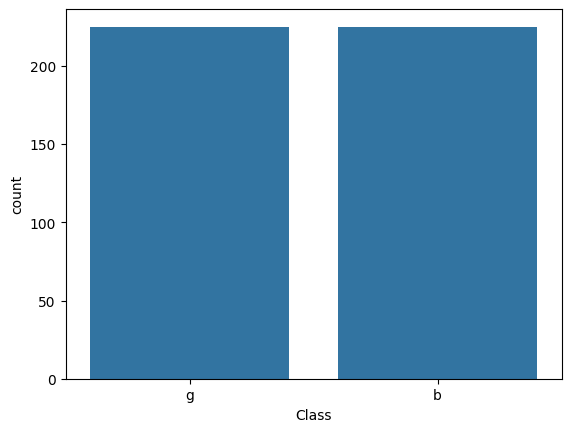

In [ ]:
sns.countplot(x='Class', data=y_borderline_smote)

In [58]:
# Разбить выборку на обучающую и тестовую в соотношение 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X_borderline_smote, y_borderline_smote, test_size=0.2, random_state=42)

In [59]:
borderline_smote_results = start_svc_knn_rf(X_train, X_test, y_train, y_test)
borderline_smote_results

SVM
На тестовой выборке
Общая точность:  0.9777777777777777
Recall:  1.0
Precision: 0.9545454545454546
F1-measure: 0.9767441860465117
--------------------
KNN
На тестовой выборке
Общая точность:  0.9333333333333333
Recall:  1.0
Precision: 0.875
F1-measure: 0.9333333333333333
--------------------
RandomForest
На тестовой выборке
Общая точность:  1.0
Recall:  1.0
Precision: 1.0
F1-measure: 1.0


,SVM,KNN,RandomForest
Общая точность,0.977778,0.933333,1.0
Recall,1.000000,1.000000,1.0
Precision,0.954545,0.875000,1.0
F1-measure,0.976744,0.933333,1.0


## borderline-SMOTE2

In [60]:
borderline_smote2 = BorderlineSMOTE(kind='borderline-2')
X_borderline_smote2, y_borderline_smote2 = borderline_smote2.fit_resample(X, y)

Проверим: данные сбалансировались!

<Axes: xlabel='Class', ylabel='count'>

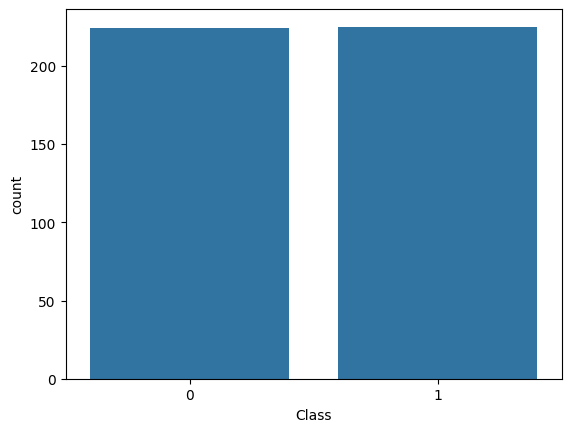

In [50]:
sns.countplot(x='Class', data=y_borderline_smote2)

In [61]:
# Разбить выборку на обучающую и тестовую в соотношение 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X_borderline_smote2, y_borderline_smote2, test_size=0.2, random_state=42)

In [62]:
borderline_smote_results2 = start_svc_knn_rf(X_train, X_test, y_train, y_test)
borderline_smote_results2

SVM
На тестовой выборке
Общая точность:  0.9111111111111111
Recall:  1.0
Precision: 0.84
F1-measure: 0.9130434782608696
--------------------
KNN
На тестовой выборке
Общая точность:  0.8888888888888888
Recall:  1.0
Precision: 0.8076923076923077
F1-measure: 0.8936170212765957
--------------------
RandomForest
На тестовой выборке
Общая точность:  0.9333333333333333
Recall:  1.0
Precision: 0.875
F1-measure: 0.9333333333333333


,SVM,KNN,RandomForest
Общая точность,0.911111,0.888889,0.933333
Recall,1.000000,1.000000,1.000000
Precision,0.840000,0.807692,0.875000
F1-measure,0.913043,0.893617,0.933333


In [63]:
smote_results

,SVM,KNN,RandomForest
Общая точность,0.911111,0.911111,0.944444
Recall,0.977273,0.977273,0.977273
Precision,0.860000,0.860000,0.914894
F1-measure,0.914894,0.914894,0.945055


In [64]:
borderline_smote_results

,SVM,KNN,RandomForest
Общая точность,0.977778,0.933333,1.0
Recall,1.000000,1.000000,1.0
Precision,0.954545,0.875000,1.0
F1-measure,0.976744,0.933333,1.0


Сравнивая полученные результирующие таблицы, можно сделать вывод, что худший результат показал borderline_smote_2.

Borderline_smote1 показал для лучший результат, а для RandomForest точность при такой балансировке составила 100% (на тестовых данных)! Балансировка помогла увеличить точность!

Лучшим для рассматриваемого набора данных оказался **Borderline - Smote**

## Визуализация с помощью t-sne и UMAP

Поэкспериментируем с разными параметрами методов t-sne и UMAP

Выберем лучший классикатор - RandomForest. И лучший балансировщик - Borderline - Smote

In [65]:
#  X_train, X_test, y_train, y_test будут содержать сбалансированные данные!
X_train, X_test, y_train, y_test = train_test_split(X_borderline_smote, y_borderline_smote, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

**t-sne**

In [66]:
def draw_tsne(perplexity=30, early_exaggeration=12, n_components=2, title=''):
    tsne = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration)
    tsne_results = tsne.fit_transform(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(tsne_results[:,0], tsne_results[:,1], c=y_pred)
    plt.title(title, fontsize=18)

по параметру perplexity

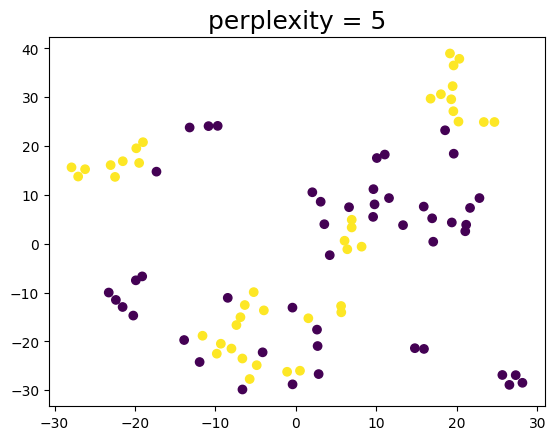

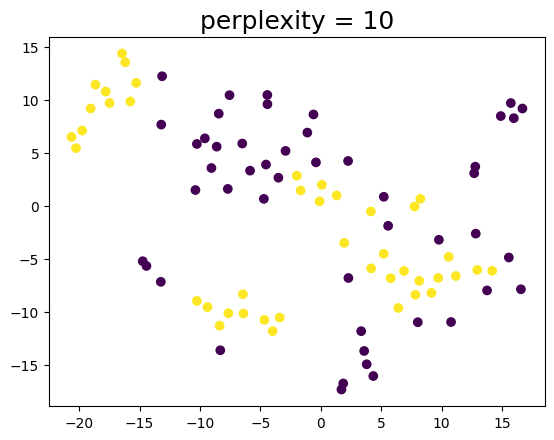

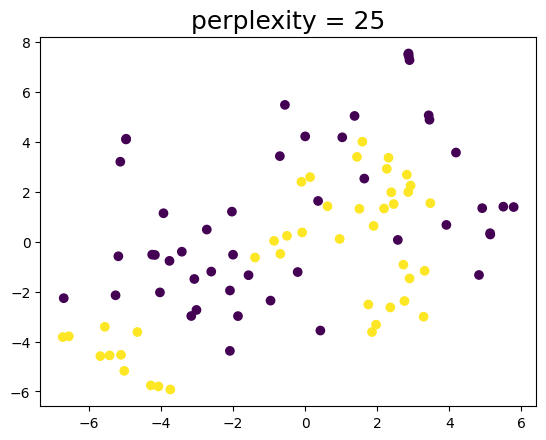

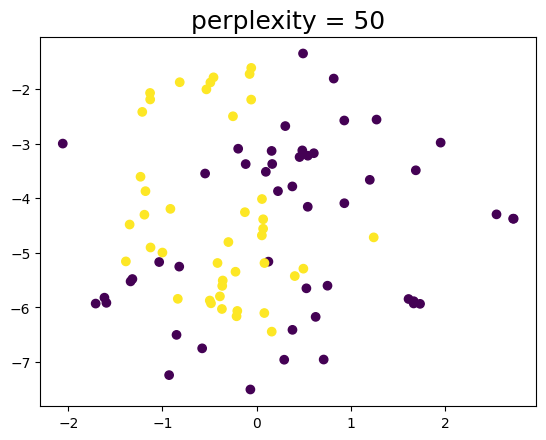

In [67]:
for n in (5, 10, 25, 50):
    draw_tsne(perplexity=n, title='perplexity = {}'.format(n))

по параметру  early_exaggeration

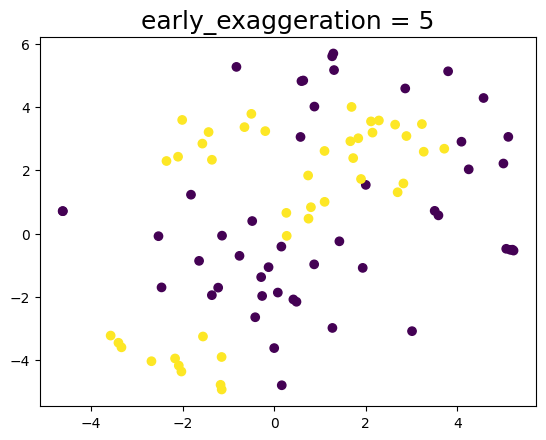

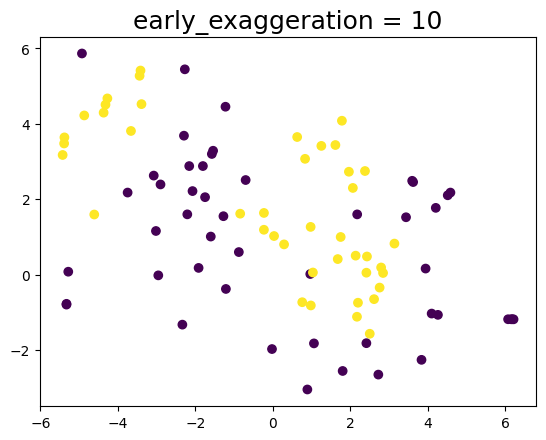

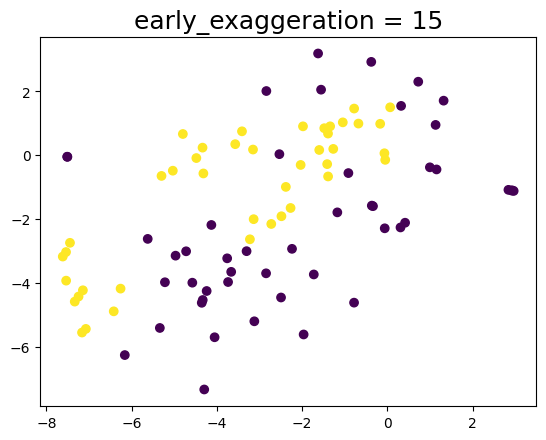

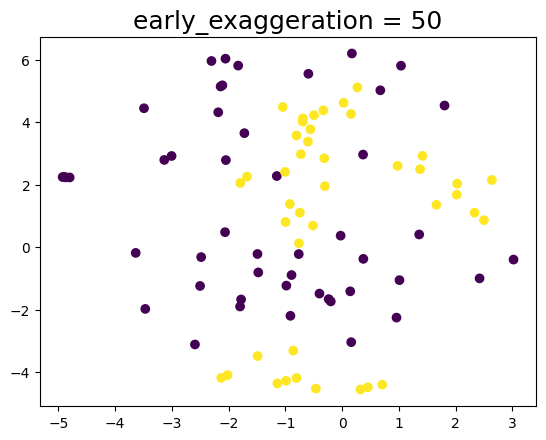

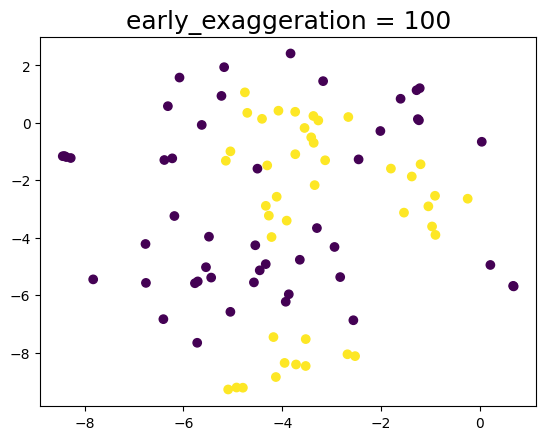

In [68]:
for n in (5, 10, 15, 50, 100):
    draw_tsne(early_exaggeration=n, title='early_exaggeration = {}'.format(n))

**umap**

In [69]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(u[:,0], u[:,1], c=y_pred)
    plt.title(title, fontsize=18)

по параметру n_neighbors

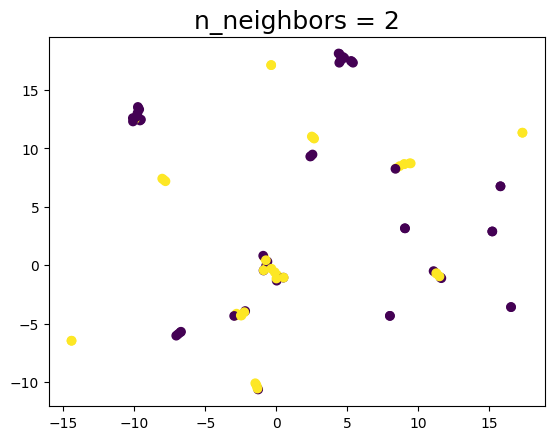

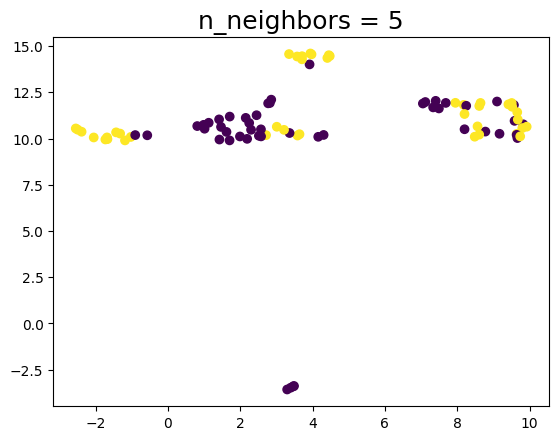

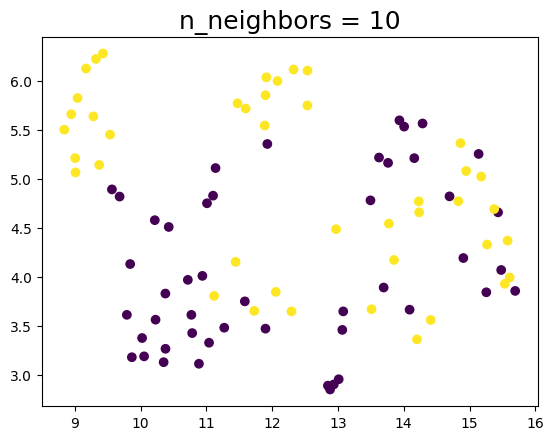

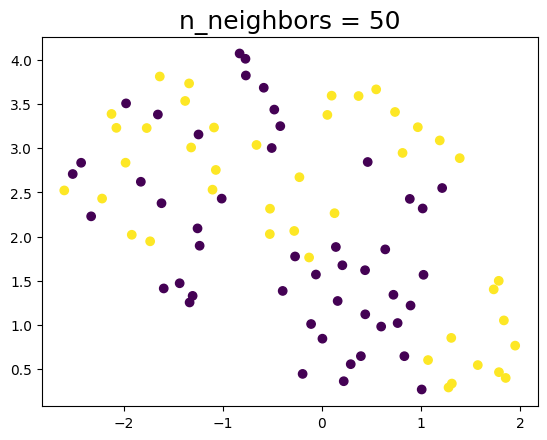

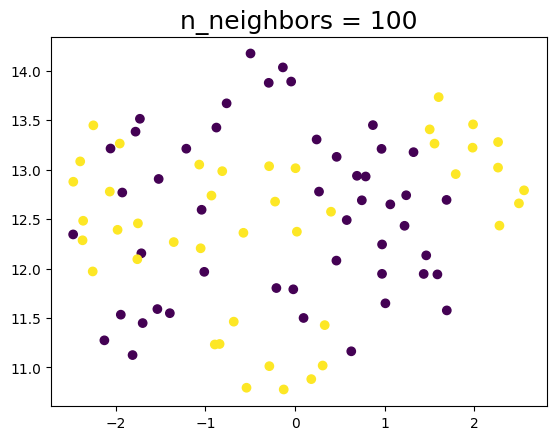

In [70]:
for n in (2, 5, 10, 50, 100):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

по параметру min_dist

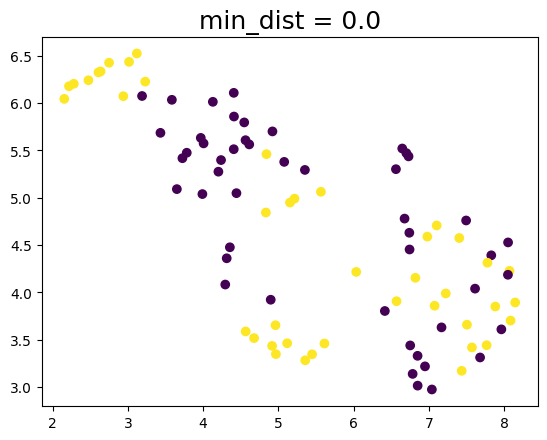

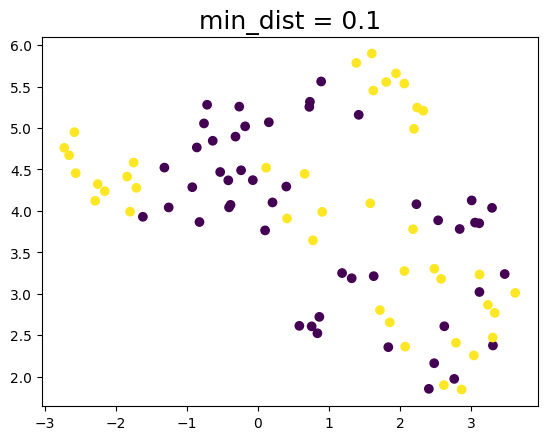

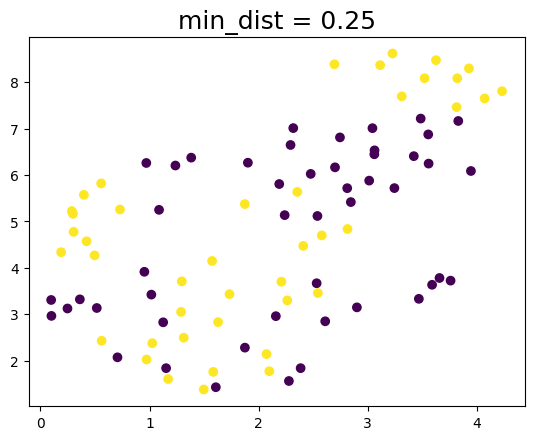

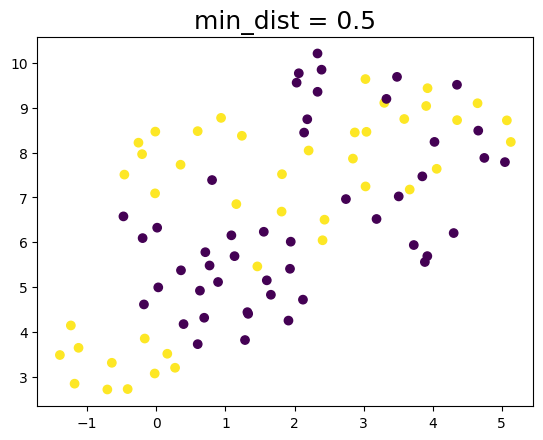

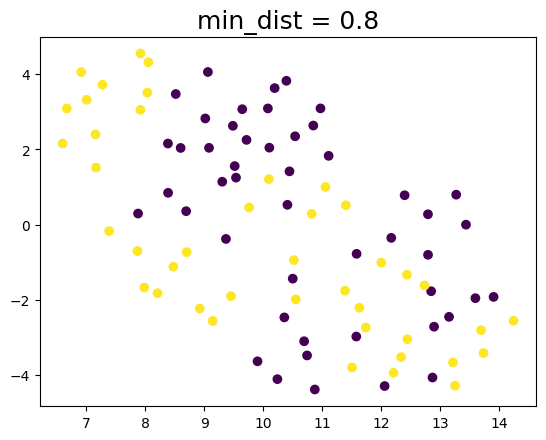

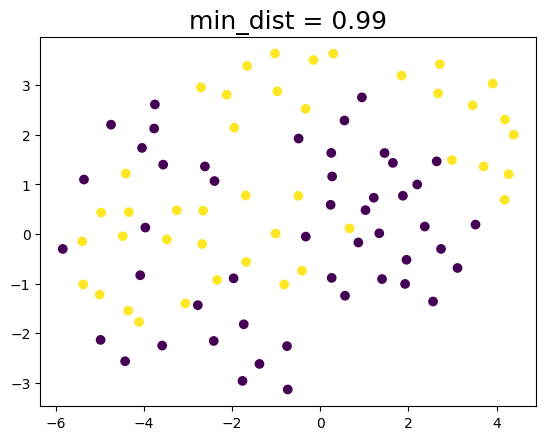

In [71]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

Рисунки разбиения на классы на основе выборок с известными
метками классов и рисунки разбиения на классы с метками выставленными
классификатором:

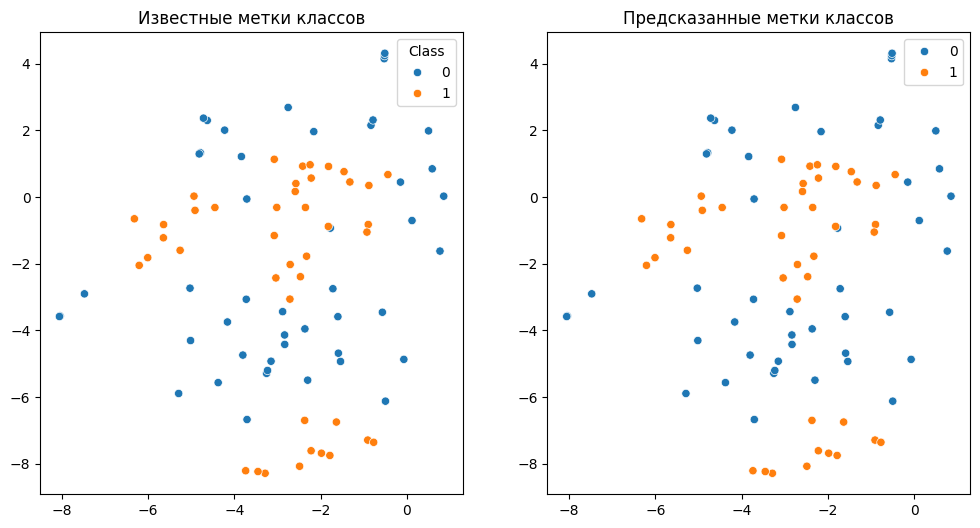

In [72]:
# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test.Class, legend='full')
plt.title('Известные метки классов')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_pred, legend='full')
plt.title('Предсказанные метки классов')

plt.show()

Рисунки полностью совпадают, точность = 100%

---

